In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df=pd.read_csv('data_1.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13199 entries, 0 to 13198
Data columns (total 96 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   attribute_0   13199 non-null  float64
 1   attribute_1   13199 non-null  float64
 2   attribute_2   13199 non-null  float64
 3   attribute_3   13199 non-null  float64
 4   attribute_4   13199 non-null  float64
 5   attribute_5   13199 non-null  float64
 6   attribute_6   13199 non-null  float64
 7   attribute_7   13199 non-null  float64
 8   attribute_8   13199 non-null  float64
 9   attribute_9   13199 non-null  float64
 10  attribute_10  13199 non-null  float64
 11  attribute_11  13199 non-null  float64
 12  attribute_12  13199 non-null  float64
 13  attribute_13  13199 non-null  float64
 14  attribute_14  13199 non-null  float64
 15  attribute_15  13199 non-null  float64
 16  attribute_16  13199 non-null  float64
 17  attribute_17  13199 non-null  float64
 18  attribute_18  13199 non-nu

In [3]:
df.describe()

attribute_0   attribute_1   attribute_2   attribute_3   attribute_4  \
count  13199.000000  13199.000000  13199.000000  13199.000000  13199.000000   
mean       0.463345      0.510979      0.509752      0.603272      0.603322   
std        0.077025      0.090347      0.081337      0.015419      0.015354   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.430191      0.474750      0.475724      0.597164      0.597268   
50%        0.469598      0.526603      0.519542      0.601827      0.601839   
75%        0.505241      0.561928      0.555115      0.609065      0.608985   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

        attribute_5   attribute_6   attribute_7   attribute_8   attribute_9  \
count  13199.000000  13199.000000  13199.000000  13199.000000  13199.000000   
mean       0.998750      0.796970      0.808855      0.303242      0.781167   
std        0.009361      0.009340      0.009934      0.008322      0.009197   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.998860      0.797077      0.809006      0.303231      0.781254   
50%        0.998968      0.797336      0.809264      0.303447      0.781509   
75%        0.999036      0.797477      0.809386      0.303536      0.781642   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

       ...  attribute_86  attribute_87  attribute_88  attribute_89  \
count  ...  1.319900e+04  13199.000000  13199.000000  13199.000000   
mean   ...  3.391346e+07      0.623808      0.603233      0.833269   
std    ...  4.599172e+08      0.009538      0.015365      0.043625   
min    ...  0.000000e+00      0.000000      0.000000      0.000000   
25%    ...  1.220500e-03      0.623218      0.597158      0.835381   
50%    ...  3.154000e-03      0.623722      0.601813      0.839617   
75%    ...  7.975000e-03      0.624063      0.609004      0.841443   
max    ...  9.820000e+09      1.000000      1.000000      1.000000   

       attribute_90  attribute_91  attribute_92  attribute_93  attribute_94  \
count  13199.000000  13199.000000  13199.000000       13199.0  13199.000000   
mean       0.287056      0.027964      0.565271           1.0      0.036217   
std        0.037132      0.014414      0.010166           0.0      0.046570   
min        0.000000      0.000000      0.000000           1.0      0.000000   
25%        0.278247      0.026638      0.564507           1.0      0.018340   
50%        0.282051      0.026791      0.565167           1.0      0.023782   
75%        0.287249      0.026916      0.565831           1.0      0.036628   
max        1.000000      1.000000      1.000000           1.0      1.000000   

              class  
count  13199.000000  
mean       0.500038  
std        0.500019  
min        0.000000  
25%        0.000000  
50%        1.000000  
75%        1.000000  
max        1.000000  

[8 rows x 96 columns]

In [4]:
df.sample(4)

attribute_0  attribute_1  attribute_2  attribute_3  attribute_4  \
2564      0.546970     0.592673     0.595535     0.614429     0.614429   
12750     0.422266     0.513250     0.470628     0.598834     0.613006   
8123      0.492062     0.549716     0.534953     0.600424     0.602000   
6897      0.385978     0.431630     0.459435     0.600760     0.595312   

       attribute_5  attribute_6  attribute_7  attribute_8  attribute_9  ...  \
2564      0.999008     0.797439     0.809354     0.303530     0.781615  ...   
12750     0.998807     0.796680     0.808659     0.303286     0.781315  ...   
8123      0.999013     0.797407     0.809324     0.303410     0.781538  ...   
6897      0.998738     0.795873     0.807397     0.300620     0.779756  ...   

       attribute_86  attribute_87  attribute_88  attribute_89  attribute_90  \
2564       0.030086      0.623683      0.614426      0.843295      0.282088   
12750      0.002863      0.623841      0.607916      0.834925      0.281994   
8123       0.016529      0.634387      0.600134      0.840289      0.284263   
6897       0.004604      0.622789      0.596702      0.815865      0.328740   

       attribute_91  attribute_92  attribute_93  attribute_94  class  
2564       0.026820      0.565290             1      0.023302      0  
12750      0.027563      0.567276             1      0.024915      1  
8123       0.030957      0.569165             1      0.020341      1  
6897       0.026602      0.563827             1      0.011627      1  

[4 rows x 96 columns]

In [5]:
df.isna().sum()

attribute_0     0
attribute_1     0
attribute_2     0
attribute_3     0
attribute_4     0
               ..
attribute_91    0
attribute_92    0
attribute_93    0
attribute_94    0
class           0
Length: 96, dtype: int64

In [6]:
df.columns

Index(['attribute_0', 'attribute_1', 'attribute_2', 'attribute_3',
       'attribute_4', 'attribute_5', 'attribute_6', 'attribute_7',
       'attribute_8', 'attribute_9', 'attribute_10', 'attribute_11',
       'attribute_12', 'attribute_13', 'attribute_14', 'attribute_15',
       'attribute_16', 'attribute_17', 'attribute_18', 'attribute_19',
       'attribute_20', 'attribute_21', 'attribute_22', 'attribute_23',
       'attribute_24', 'attribute_25', 'attribute_26', 'attribute_27',
       'attribute_28', 'attribute_29', 'attribute_30', 'attribute_31',
       'attribute_32', 'attribute_33', 'attribute_34', 'attribute_35',
       'attribute_36', 'attribute_37', 'attribute_38', 'attribute_39',
       'attribute_40', 'attribute_41', 'attribute_42', 'attribute_43',
       'attribute_44', 'attribute_45', 'attribute_46', 'attribute_47',
       'attribute_48', 'attribute_49', 'attribute_50', 'attribute_51',
       'attribute_52', 'attribute_53', 'attribute_54', 'attribute_55',
       'attribut

In [7]:
df.shape

(13199, 96)

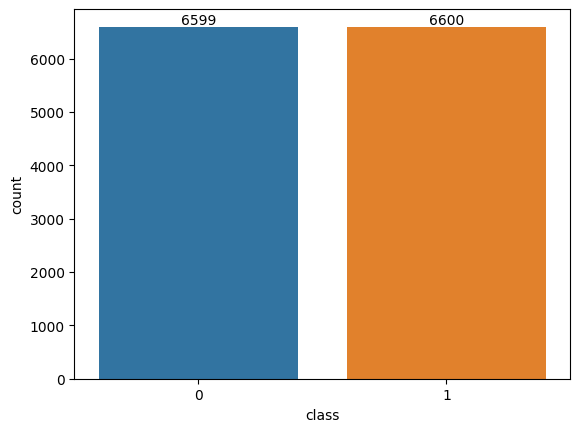

In [8]:
ax=sns.countplot(data=df,x='class')
for label in ax.containers:
    ax.bar_label(label)
plt.show()

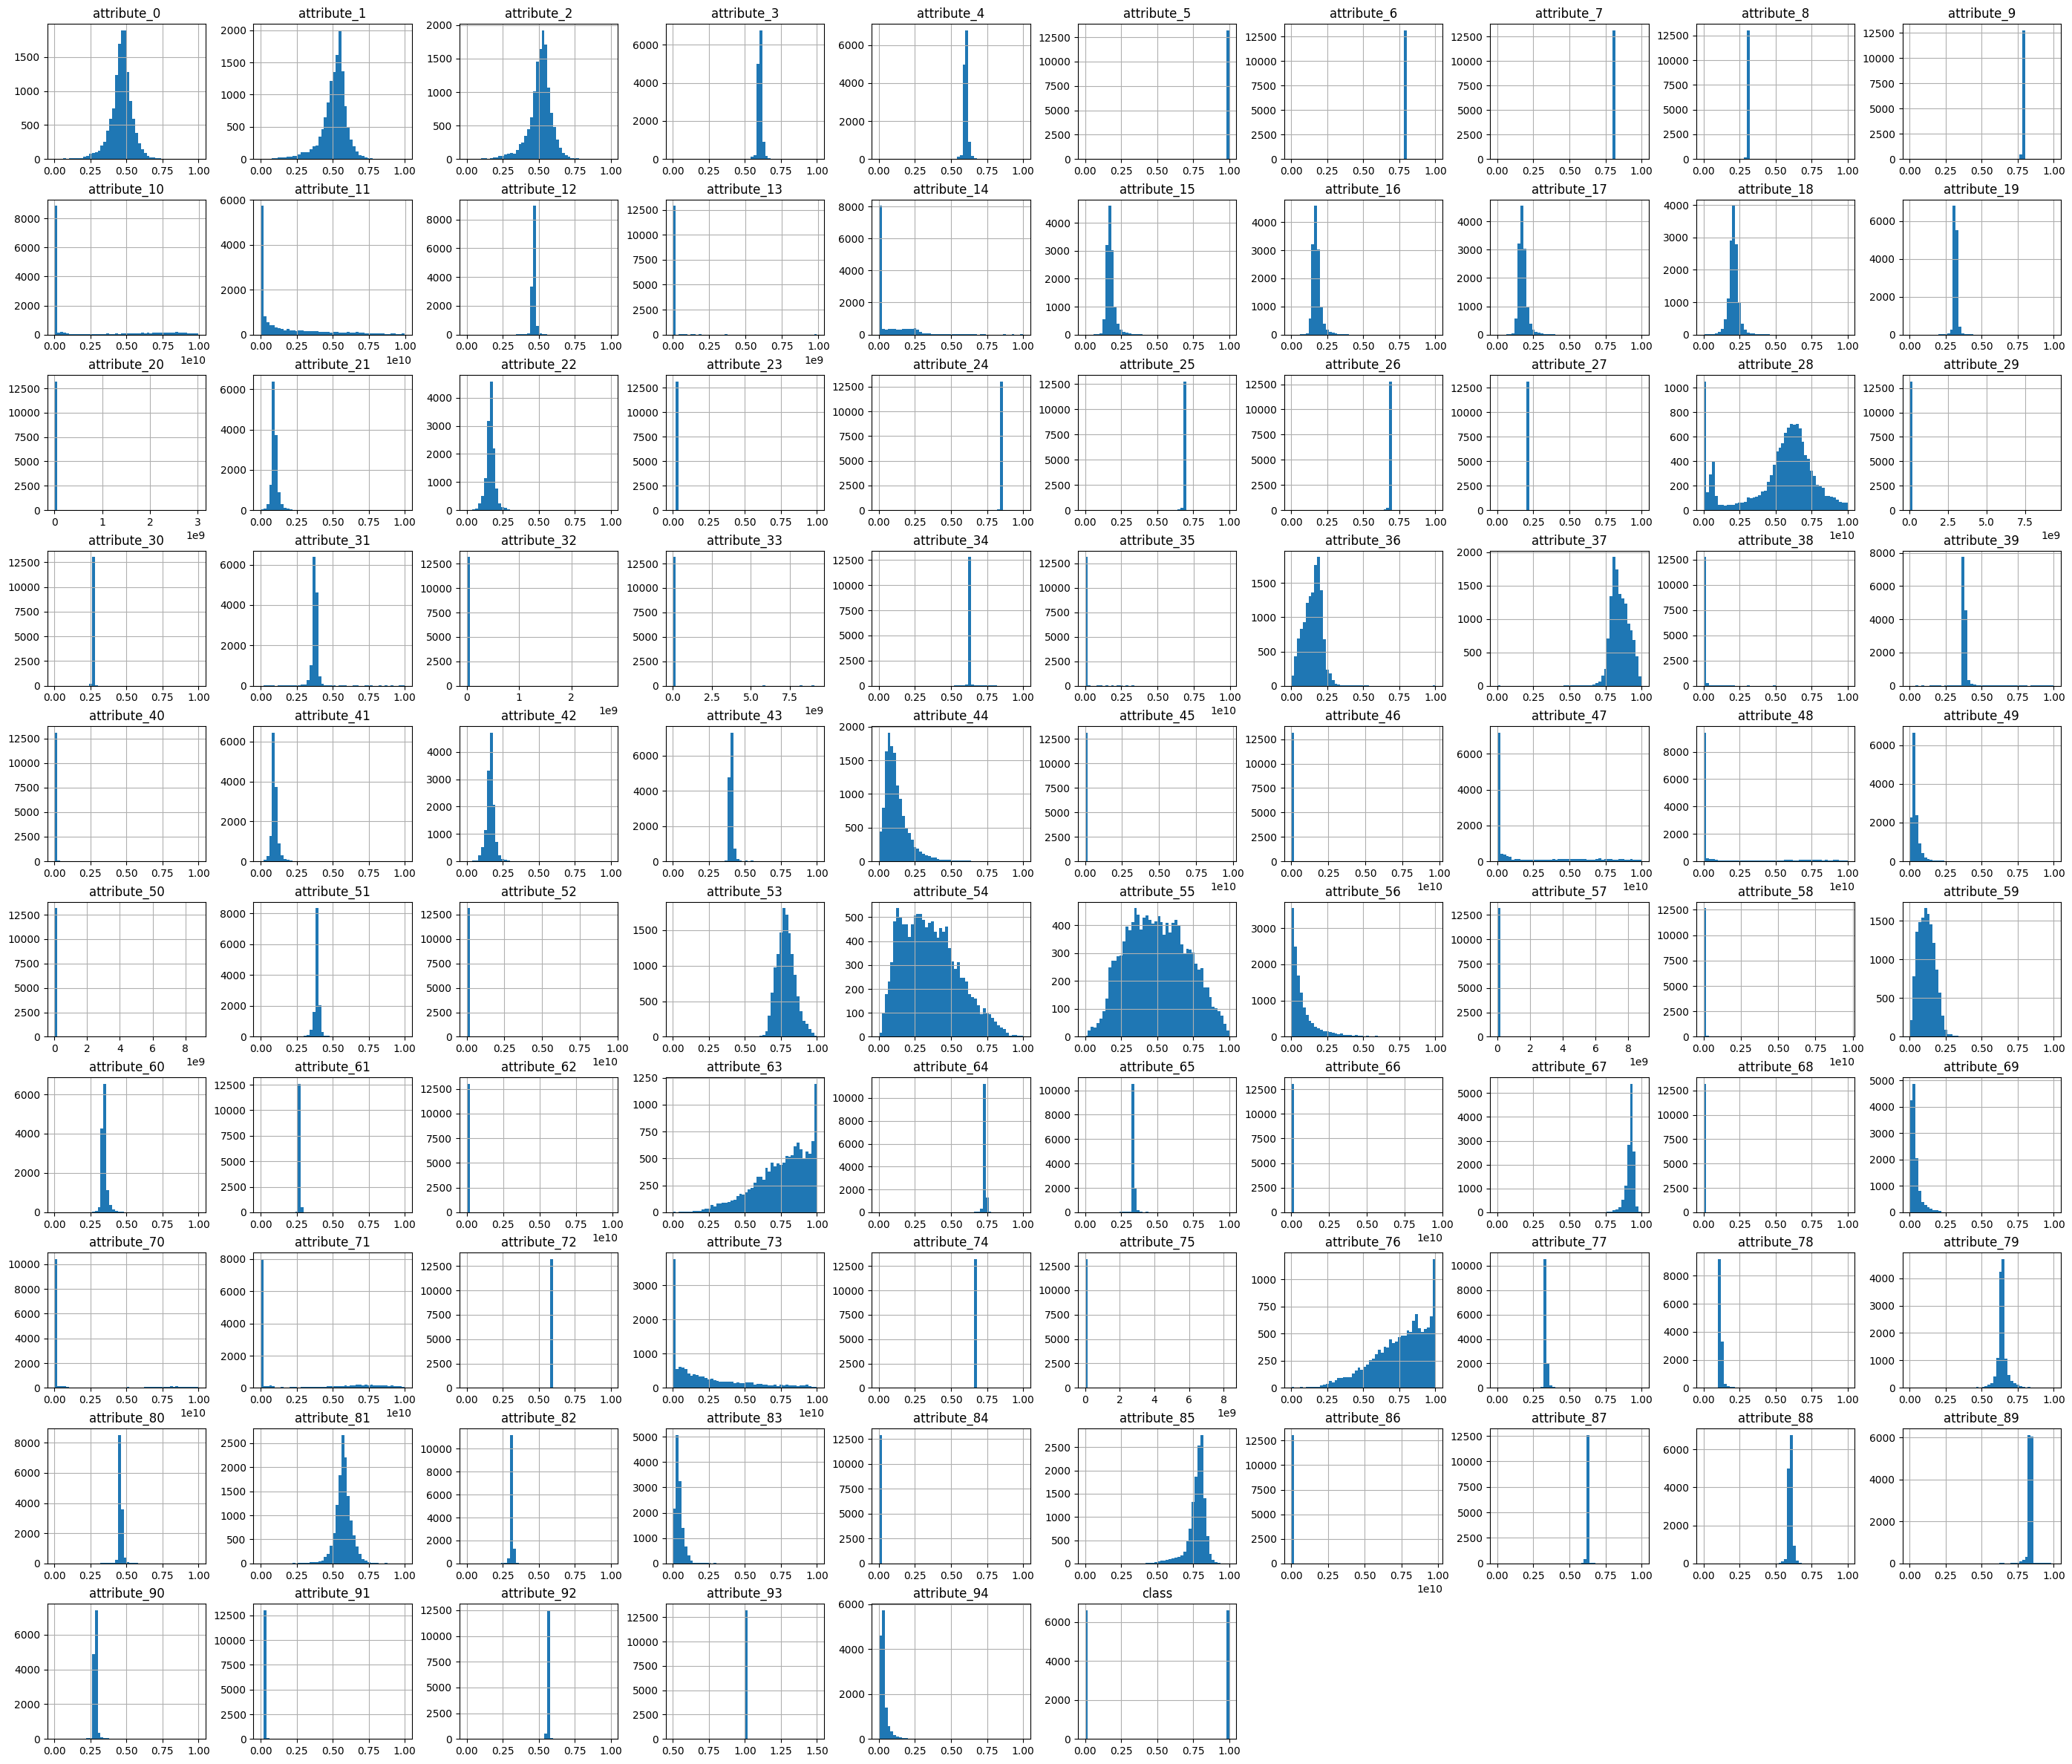

In [25]:
df.hist(figsize=(35,30),bins=50)
plt.show()

In [9]:
y=df['class']
x=df.drop(columns=['class'])
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [10]:
x_train

attribute_0  attribute_1  attribute_2  attribute_3  attribute_4  \
10352     0.419076     0.470711     0.521633     0.569103     0.599253   
434       0.407059     0.461731     0.453986     0.611439     0.611439   
9536      0.234320     0.484466     0.302848     0.616367     0.604212   
3738      0.543168     0.576701     0.599336     0.607035     0.607035   
11333     0.479796     0.553531     0.536318     0.620299     0.615186   
...            ...          ...          ...          ...          ...   
1236      0.467167     0.556476     0.515445     0.598178     0.598178   
10684     0.419035     0.454209     0.486957     0.611664     0.620345   
1522      0.442402     0.500927     0.497564     0.596845     0.596794   
13192     0.489374     0.546529     0.536416     0.623247     0.619297   
7986      0.395040     0.442824     0.436822     0.601966     0.598679   

       attribute_5  attribute_6  attribute_7  attribute_8  attribute_9  ...  \
10352     0.998329     0.795299     0.806264     0.302758     0.778783  ...   
434       0.998753     0.796840     0.808799     0.303017     0.781052  ...   
9536      0.999003     0.797012     0.809073     0.302628     0.781196  ...   
3738      0.999139     0.797554     0.809456     0.303455     0.781728  ...   
11333     0.998973     0.797580     0.809388     0.304190     0.781629  ...   
...            ...          ...          ...          ...          ...  ...   
1236      0.998962     0.797397     0.809330     0.303552     0.781513  ...   
10684     0.998207     0.785018     0.786109     0.272452     0.756111  ...   
1522      0.998895     0.797310     0.809257     0.303542     0.781511  ...   
13192     0.999065     0.797455     0.809346     0.303421     0.781599  ...   
7986      0.998633     0.796288     0.808708     0.303031     0.780694  ...   

       attribute_85  attribute_86  attribute_87  attribute_88  attribute_89  \
10352      0.747057      0.075788      0.622506      0.577239      0.833869   
434        0.750353      0.004740      0.623785      0.611436      0.837255   
9536       0.609074      0.000960      0.623581      0.608946      0.798192   
3738       0.819298      0.011317      0.623573      0.607035      0.842164   
11333      0.808912      0.022396      0.623571      0.624197      0.840555   
...             ...           ...           ...           ...           ...   
1236       0.801485      0.000994      0.623149      0.598178      0.841080   
10684      0.765636      0.009860      0.616189      0.624396      0.833204   
1522       0.779708      0.005794      0.623870      0.596840      0.838612   
13192      0.801986      0.000641      0.623682      0.619844      0.840540   
7986       0.733309      0.011164      0.623471      0.596892      0.833622   

       attribute_90  attribute_91  attribute_92  attribute_93  attribute_94  
10352      0.288958      0.026674      0.564206             1      0.022256  
434        0.276871      0.026773      0.565068             1      0.054439  
9536       0.484774      0.026892      0.565123             1      0.019468  
3738       0.281170      0.026888      0.565581             1      0.025150  
11333      0.280089      0.027386      0.566330             1      0.027564  
...             ...           ...           ...           ...           ...  
1236       0.295111      0.030206      0.569006             1      0.014970  
10684      0.284814      0.029921      0.567364             1      0.019762  
1522       0.280737      0.026608      0.564101             1      0.026216  
13192      0.280471      0.027182      0.566124             1      0.023267  
7986       0.280055      0.026678      0.564606             1      0.021893  

[10559 rows x 95 columns]

In [11]:
x_test.shape

(2640, 95)

In [12]:
y_train

10352    1
434      0
9536     1
3738     0
11333    1
        ..
1236     0
10684    1
1522     0
13192    1
7986     1
Name: class, Length: 10559, dtype: int64

In [13]:
from sklearn.tree import DecisionTreeClassifier
dec = DecisionTreeClassifier(max_depth=5,min_samples_leaf=3,min_samples_split=4)
dec.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=3, min_samples_split=4)

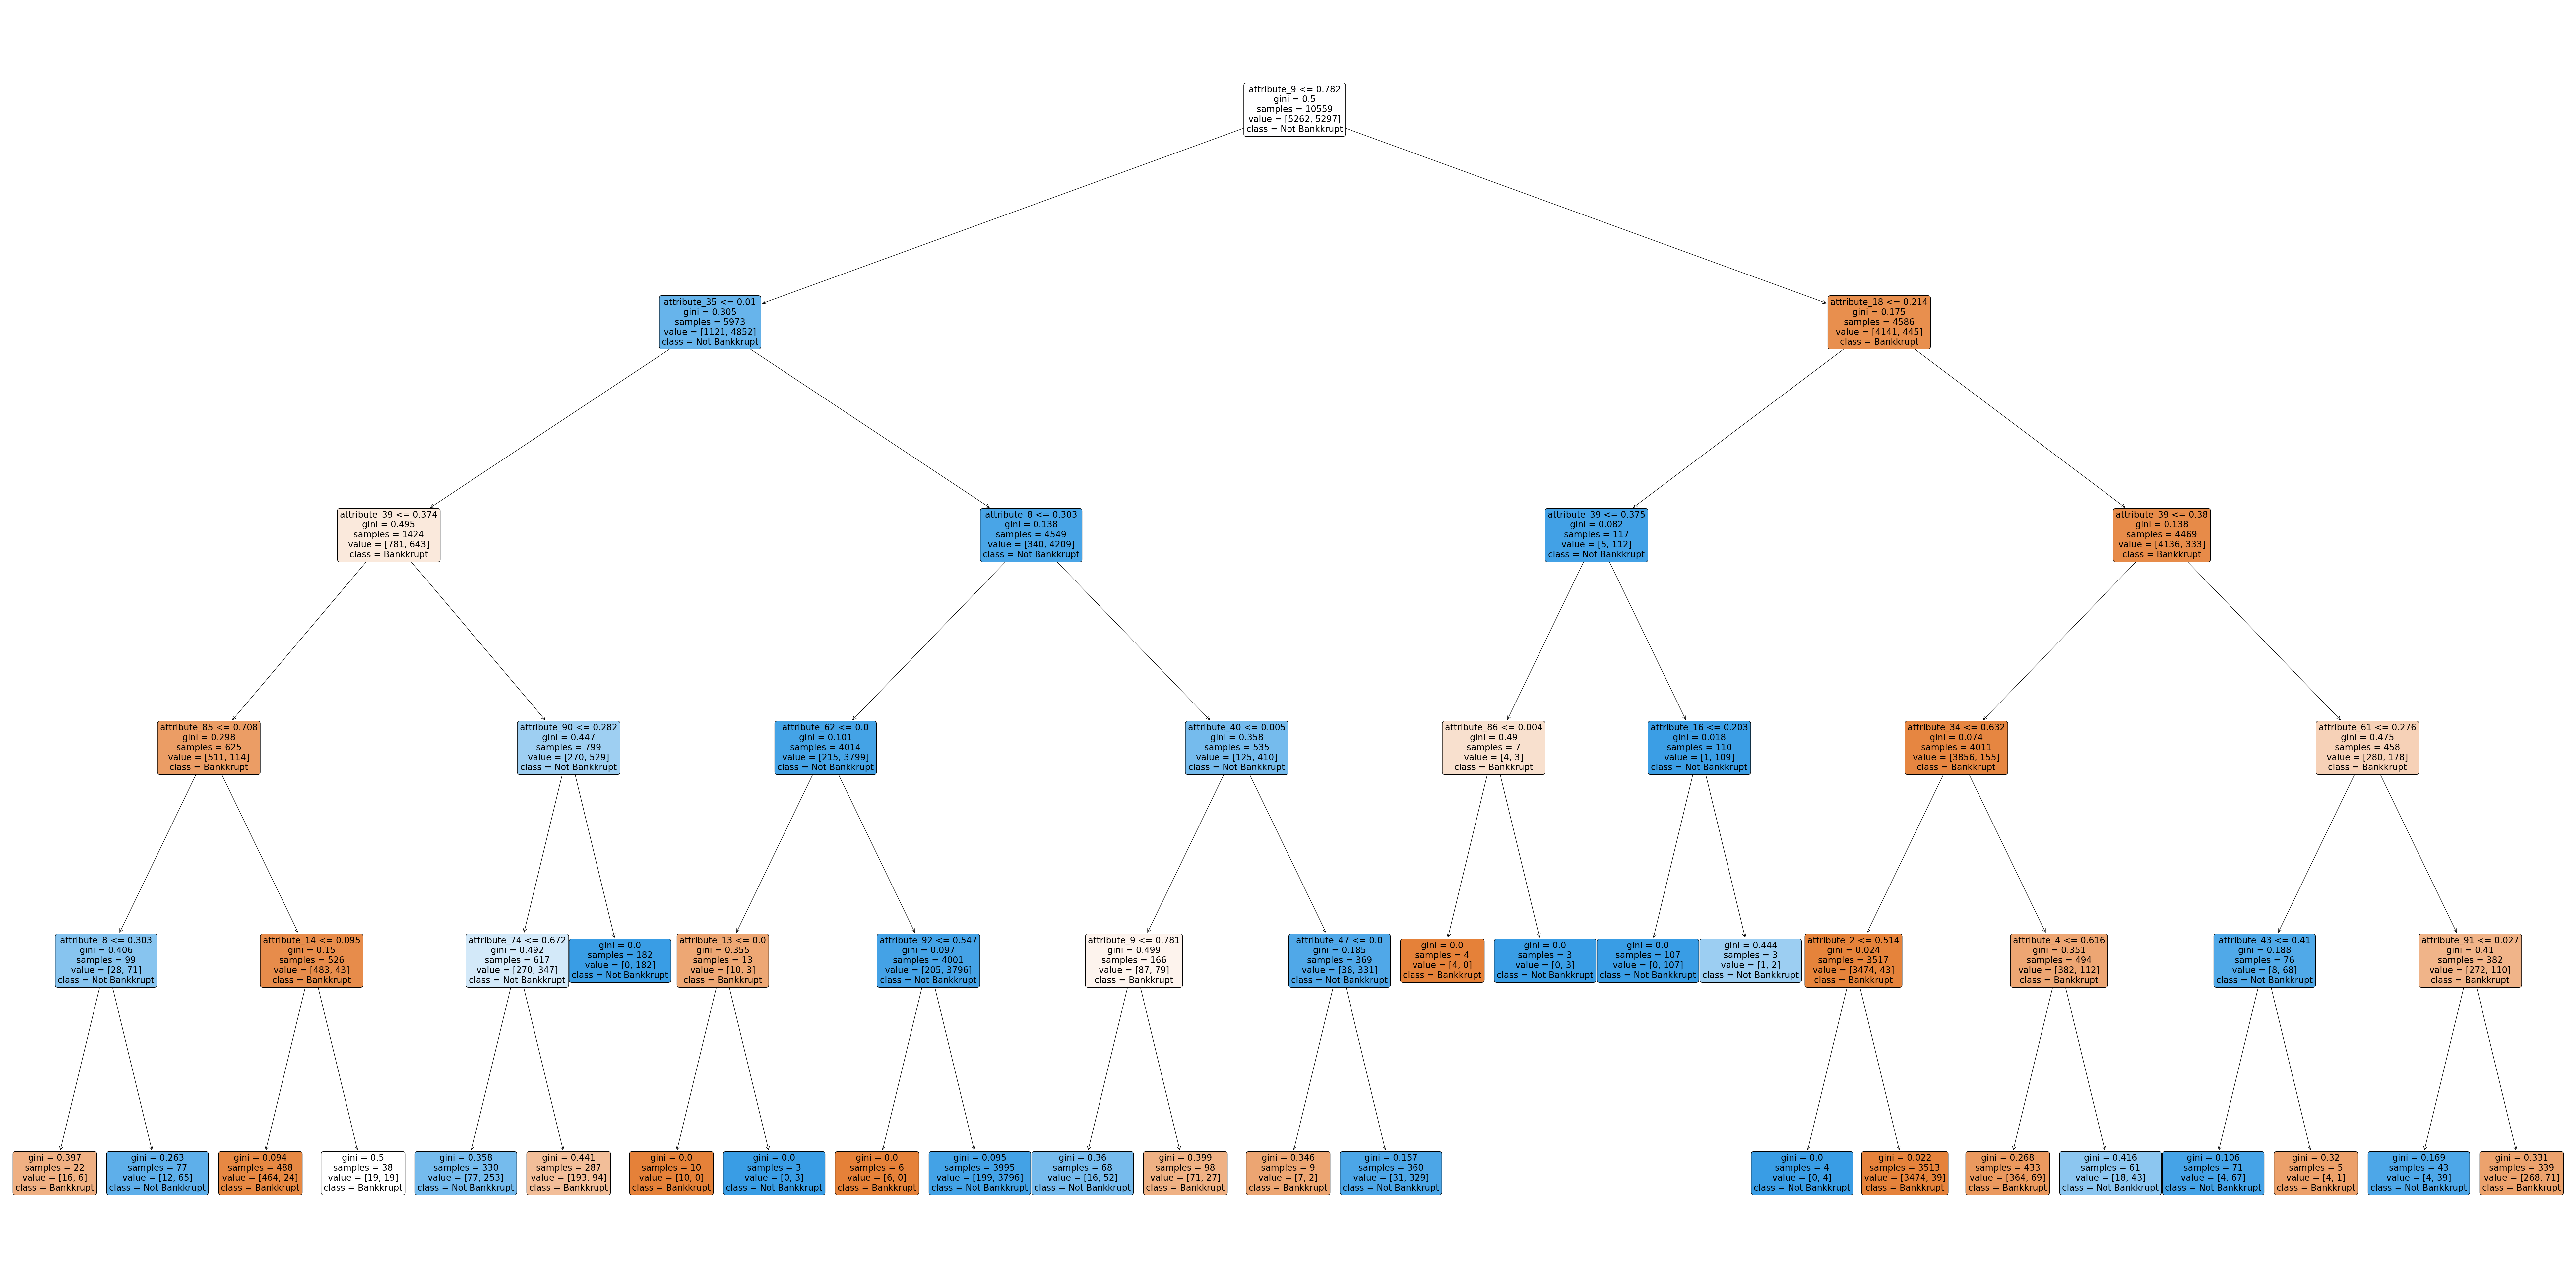

In [14]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualize the Decision Tree
plt.figure(figsize=(100, 50))
plot_tree(dec, feature_names=x_train.columns, class_names=["Bankkrupt", "Not Bankkrupt"], 
          filled=True, rounded=True)
plt.show()

In [15]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42,n_estimators=61,max_depth=10,bootstrap=True)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=61, random_state=42)

In [16]:
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay

sv_clf = SVC(kernel = 'rbf' ,gamma = 0.5 , C= 1.0)
sv_clf.fit(x_train,y_train)


SVC(gamma=0.5)

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score


res_df = pd.DataFrame(index=['Accuracy', 'Precision', 'Recall'])


for model in [dec, rf, sv_clf]:
    predictions = model.predict(x_test)
    
    accuracy = accuracy_score(y_test, predictions)
    recall = recall_score(y_test, predictions, zero_division=0)
    precision = precision_score(y_test, predictions,zero_division=0)
    
    res_df[type(model).__name__] = [accuracy, precision, recall]


print("\nResults DataFrame:")
res_df


Results DataFrame:


DecisionTreeClassifier  RandomForestClassifier       SVC
Accuracy                 0.919697                0.962879  0.508333
Precision                0.913571                0.936911  0.500961
Recall                   0.924789                0.991558  1.000000

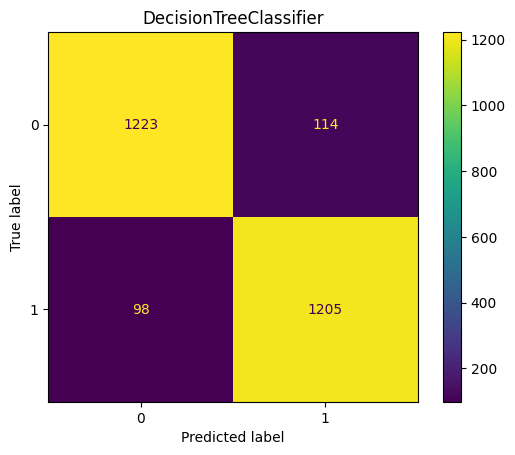

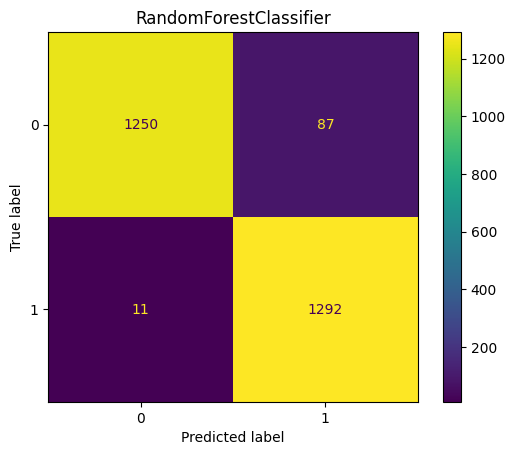

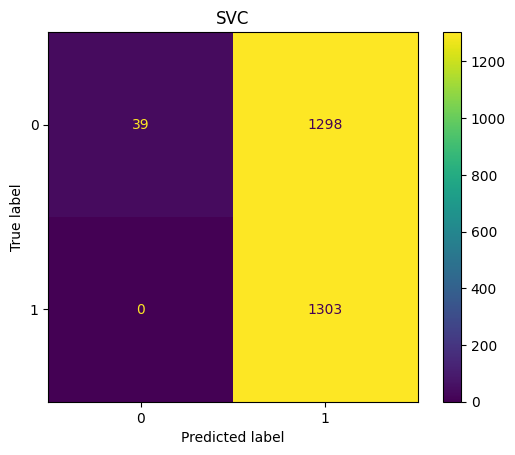

In [18]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
l1 = [dec,rf,sv_clf]
sensitivity=list()
specificity=list()
for model in l1:
    cm = confusion_matrix(y_test, model.predict(x_test), labels=model.classes_)
    tp=cm[1][1]
    tn=cm[0][0]
    fp=cm[0][1]
    fn=cm[1][0]
    sensitivity.append(tp/(tp+fn))
    specificity.append(tn/(tn+fp))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
    disp.plot()
    plt.title(type(model).__name__)
    plt.show()  

In [19]:
print(sensitivity)
print(specificity)

[0.9247889485801996, 0.9915579432079816, 1.0]
[0.9147344801795063, 0.9349289454001496, 0.02916978309648467]


In [20]:
ss_df=pd.DataFrame([sensitivity,specificity],
               columns=[type(dec).__name__, type(rf).__name__, type(sv_clf).__name__],
                  index=['Sensitivity','Specificity'])
ss_df

DecisionTreeClassifier  RandomForestClassifier      SVC
Sensitivity                0.924789                0.991558  1.00000
Specificity                0.914734                0.934929  0.02917

In [21]:
from sklearn.metrics import roc_curve
import plotly.graph_objects as go


for model in [dec, rf]:
    y_scores = model.predict_proba(x_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)

    trace0 = go.Scatter(
        x=fpr,
        y=tpr,
        mode='lines',
        name='ROC curve'
    )

    n = 10  
    indices = np.arange(len(thresholds)) % n == 0

    trace1 = go.Scatter(
        x=fpr[indices], 
        y=tpr[indices], 
        mode='markers+text', 
        name='Threshold points', 
        text=[f"Thr={thr:.2f}" for thr in thresholds[indices]], 
        textposition='top center'
    )


    trace2 = go.Scatter(
        x=[0, 1], 
        y=[0, 1], 
        mode='lines', 
        name='Random (Area = 0.5)', 
        line=dict(dash='dash')
    )

    data = [trace0, trace1, trace2]

    layout = go.Layout(
        title='Receiver Operating Characteristic',
        xaxis=dict(title='False Positive Rate'),
        yaxis=dict(title='True Positive Rate'),
        autosize=False,
        width=800,
        height=800,
        showlegend=False
    )

    fig = go.Figure(data=data, layout=layout)

    fig.show()